# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction to the Project: Analysis of the TMDB Movie Dataset

### Background
In today's data-driven world, movies play a central role in the entertainment industry, influencing culture, and serving as a significant economic factor. Understanding the dynamics that determine the success of a film is therefore of great interest to filmmakers, production companies, and analysts. The TMDB Movie Dataset provides an extensive collection of film attributes, including budget, revenue, ratings, and popularity. Analyzing this dataset allows us to gain insights into the film industry and may help identify factors that influence the commercial success and popularity of movies.

### Objectives
The main goal of this project is to examine the TMDB Movie Dataset to identify patterns, trends, and correlations between various film attributes. Specifically, we focus on the following questions:

1.  How has the production of movies evolved over the years?
2.  Is there a significant relationship between a film's budget and its revenue?
3.  How do ratings and popularity influence the financial performance of a film?
4.  Which genres are the most popular and generate the highest revenue?
5.  By answering these questions, we aim to gain deeper insights into the success factors of movies and potentially develop recommendations for film producers and marketers to optimize their strategies.

### Methodology
To achieve these objectives, we will navigate through various stages of data cleaning, exploration, and analysis of the TMDB Movie Dataset. This includes:

1.  Data Cleaning: Removing irrelevant data, addressing missing values, and handling duplicates.
2.  Exploratory Data Analysis (EDA): Examining distributions and relationships between different film attributes.
3.  Visualization: Creating charts and graphs to visually represent the results of our analyses.
4.  Statistical Analysis: Applying statistical tests to evaluate the significance of observations.
### Conclusion
The ultimate goal of this project is to provide valuable insights into the film industry that may be of interest to various stakeholders. Through a thorough analysis and assessment of the data, we hope to shed light on the complexity and dynamics behind the success of movies and derive informed recommendations that can contribute to enhancing the performance of future film projects.

<a id='wrangling'></a>
## Data wrangling: cleaning and preparing the TMDB film data set
Data wrangling is a critical step in any data analysis project, ensuring that the data is clean and structured for subsequent analysis. Below we describe the steps we took to prepare the TMDB film data set for our analysis.

### Step 1: Load data
First, we load the TMDB film data set to get an overview of the existing data. This step involves reading the CSV file into a pandas DataFrame, which serves as the basis for our further data processing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
pd.set_option('display.expand_frame_repr', False)

# Load data
df = pd.read_csv("tmdb-movies.csv")

### Step 2: First data check
After loading the data, we perform an initial check to understand the structure of the DataFrame, including the number of rows and columns, and take a first look at the existing data.

In [2]:
# Check the first lines of the DataFrame, the non-zero numbers and DTypes
print(df.head)
print(df.info())

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue                original_title                                               cast                                           homepage            director                                            tagline  ...                                           overview runtime                                     genres                               production_companies release_date vote_count  vote_average  release_year    budget_adj   revenue_adj
0      135397  tt0369610   32.985763  150000000  1513528810                Jurassic World  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...                      http://www.jurassicworld.com/     Colin Trevorrow                                  The park is open.  ...  Twenty-two years after the events of Jurassic ...     124  Action|Adventure|Science Fiction|Thriller  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562           6.5          2

### Step 3: Remove unnecessary columns
To simplify the analysis and focus on relevant data, we remove columns that are not necessary for our analysis objectives.

In [3]:
# Remove columns that are not required for the analysis to increase data clarity
columns_to_drop = ["id", "imdb_id", "cast", "homepage", "tagline", "keywords", "overview"]
df.drop(columns_to_drop, inplace=True, axis=1)

### Step 4: Remove duplicates
Duplicates can affect the analysis by distorting the data. We remove all duplicates from the DataSet.

In [4]:
# Remove duplicates to ensure data quality
df.drop_duplicates(inplace=True)

### Step 5: Data type corrections
The correction of data types is necessary to ensure that calculations and analyses can be carried out correctly.

In [5]:
# Correction of the date format
df['release_date'] = pd.to_datetime(df['release_date'].str[:-2] + df['release_year'].astype(str))

### Step 6: Rename columns
The renaming of columns is necessary to better understand what the respective column entries mean

In [6]:
# Rename columns for a more intuitive interpretation
df.rename(columns={'popularity': 'popularity_percent', 'vote_average': 'average_rating'}, inplace=True)

### Step 7: Check again
It is important to check again to ensure that the changes have been made correctly.

In [7]:
# Check the first lines of the DataFrame, the non-zero numbers and DTypes
print(df.head)
print(df.info())

<bound method NDFrame.head of        popularity_percent     budget     revenue                original_title            director  runtime                                     genres                               production_companies release_date  vote_count  average_rating  release_year    budget_adj   revenue_adj
0               32.985763  150000000  1513528810                Jurassic World     Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562             6.5          2015  1.379999e+08  1.392446e+09
1               28.419936  150000000   378436354            Mad Max: Fury Road       George Miller      120  Action|Adventure|Science Fiction|Thriller  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185             7.1          2015  1.379999e+08  3.481613e+08
2               13.112507  110000000   295238201                     Insurgent    Robert Schwentke      119        

<a id='eda'></a>
## Exploratory data analysis (EDA) of the TMDB film data set
Exploratory data analysis (EDA) is an essential step to better understand the data, detect patterns, identify anomalies and generate hypotheses for further analyses. In this section, we perform various analyses to examine the TMDB film data set from different angles.

### Overview of the data
Before diving deeper into specific analyses, let's get a general overview of the data by looking at distributions and statistics of the main variables.

In [20]:
def plot_distribution(data, column, title, xlabel, ylabel, log_scale=False, scatter=False):
    plt.figure(figsize=(10, 6))
    
    if scatter:
        sns.scatterplot(x=data['budget_adj'], y=data['revenue_adj'], alpha=0.5)
        plt.xscale('log')
        plt.yscale('log')
    else:
        sns.histplot(data[column], bins=20, kde=True, log_scale=log_scale)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


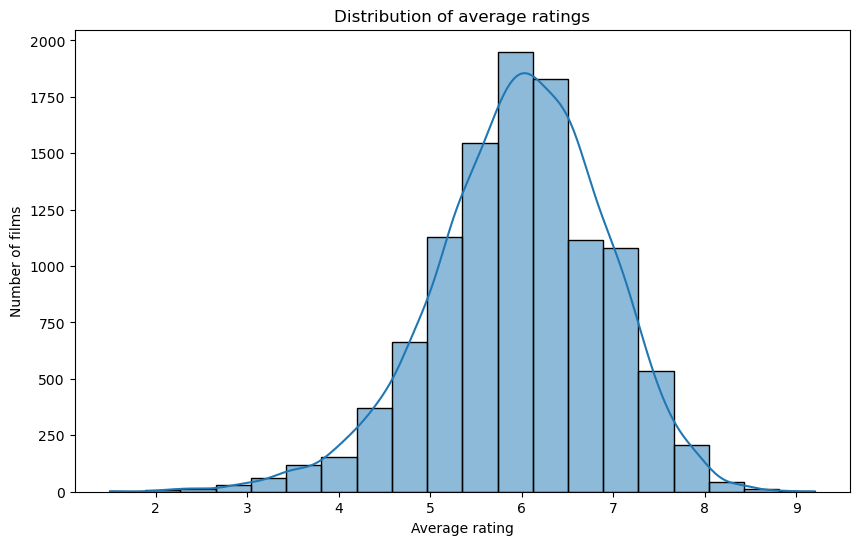

In [9]:
plot_distribution(df, 'average_rating', 'Distribution of average ratings',
                  'Average rating', 'Number of films')

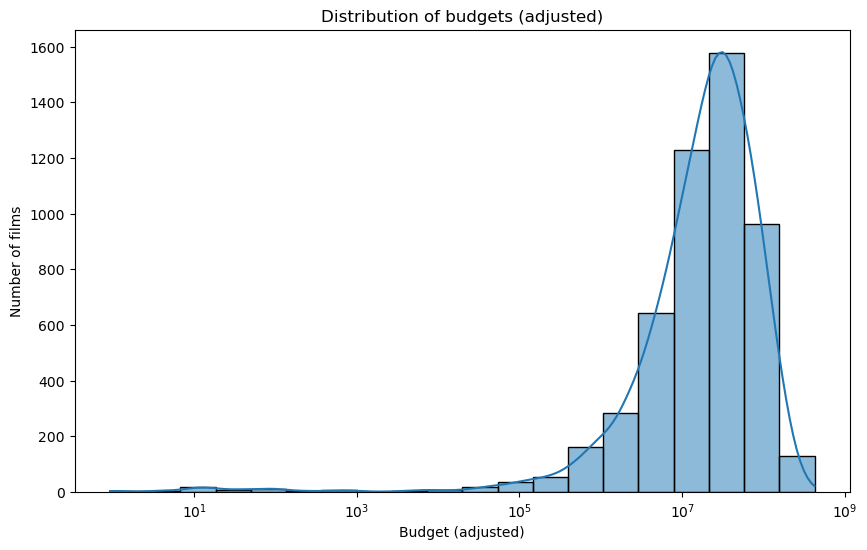

In [10]:
plot_distribution(df[df['budget_adj'] > 0], 'budget_adj', 'Distribution of budgets (adjusted)',
                  'Budget (adjusted)', 'Number of films', log_scale=True)

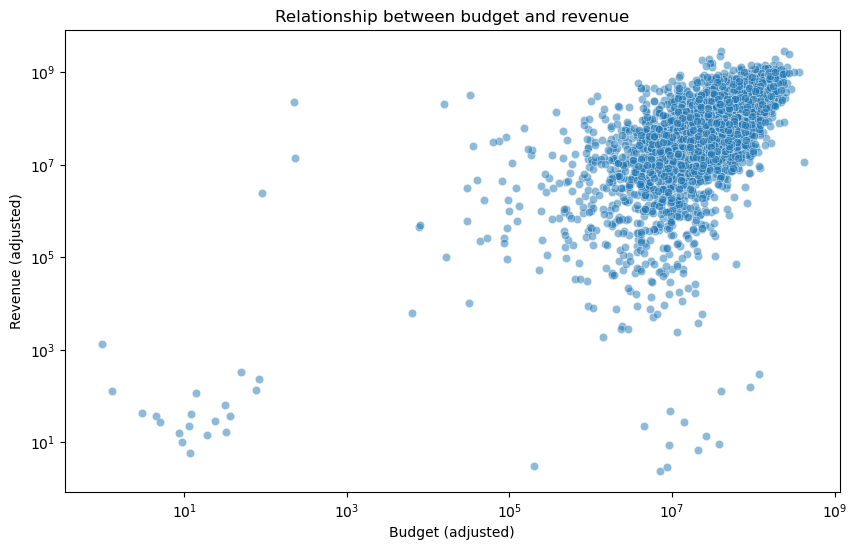

In [11]:
plot_distribution(df, None, 'Relationship between budget and revenue',
                  'Budget (adjusted)', 'Revenue (adjusted)', scatter=True)

### Research Question 1
How has film evolved in terms of the top 5 genres in terms of number of films and popularity over the years?

In [12]:
def prepare_data_genres(data, y_column, genres=None):
    years_genres_data = data.dropna(subset=['genres']).copy()
    years_genres_data['genres'] = years_genres_data['genres'].str.split('|')
    years_genres_data = years_genres_data.explode('genres')

    groupby_columns = ['release_year', 'genres']

    if y_column == 'size':
        years_genres_data = years_genres_data.groupby(groupby_columns).size().unstack(fill_value=0)
    elif y_column == 'mean':
        years_genres_data = years_genres_data.groupby(groupby_columns)['popularity_percent'].mean().unstack(fill_value=0)

    # Select specific genres if provided
    if genres:
        years_genres_data = years_genres_data[genres]

    return years_genres_data

def plot_movies_over_years(data, y_column, genres=None, title=None, y_label=None):
    # Prepare the data
    years_genres_data = prepare_data_genres(data, y_column, genres)

    # Plot the data
    plt.figure(figsize=(12, 7))
    for genre in years_genres_data.columns:
        plt.plot(years_genres_data.index, years_genres_data[genre], label=genre, marker='o', linestyle='-', markersize=5)

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


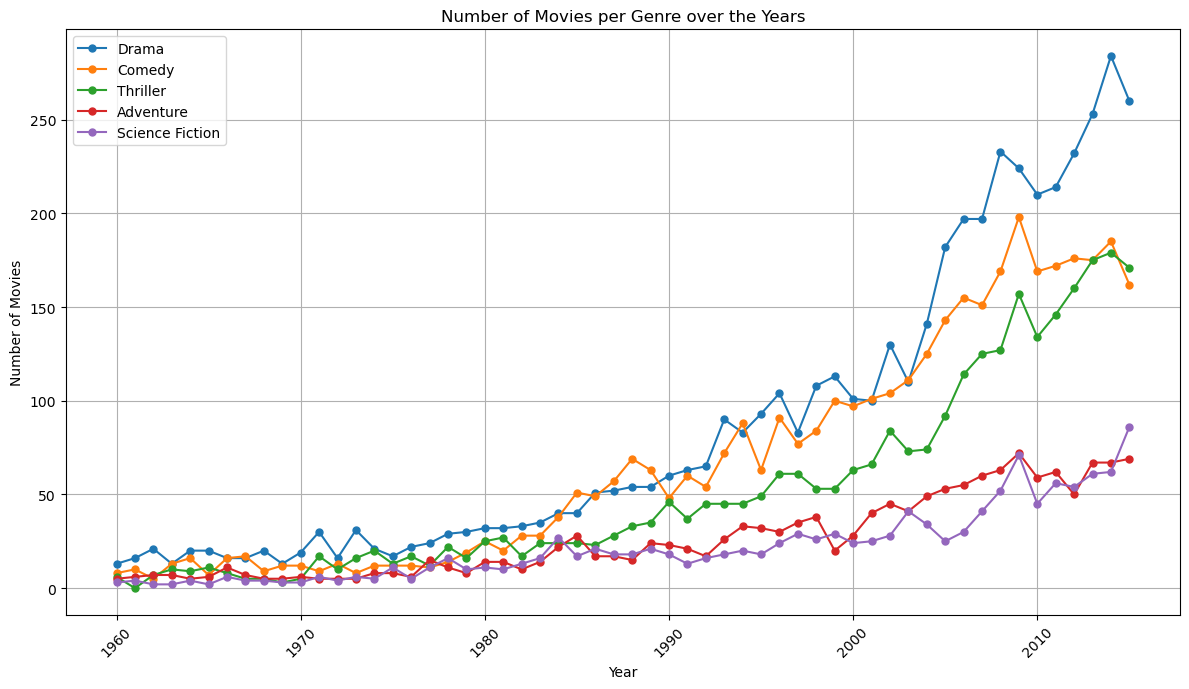

In [13]:
plot_movies_over_years(df, 'size', genres=['Drama', 'Comedy', 'Thriller', 'Adventure', 'Science Fiction'],
                        title='Number of Movies per Genre over the Years', y_label='Number of Movies')

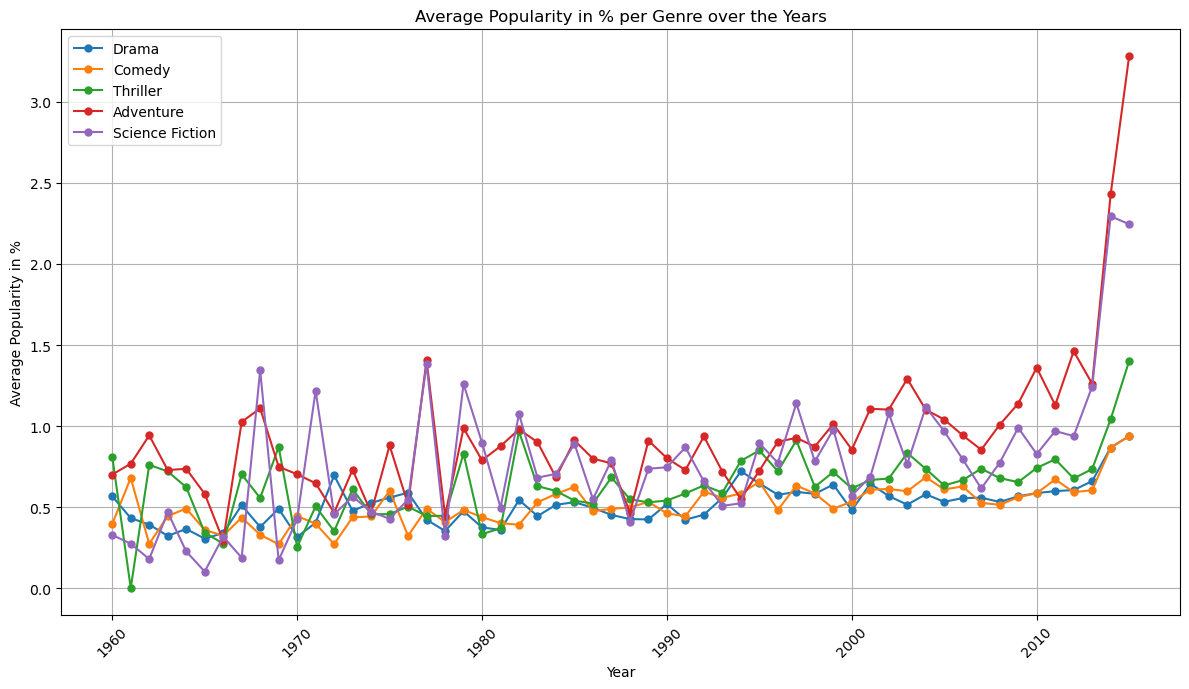

In [14]:
plot_movies_over_years(df, 'mean', genres=['Drama', 'Comedy', 'Thriller', 'Adventure', 'Science Fiction'],
                        title='Average Popularity in % per Genre over the Years', y_label='Average Popularity in %')

1.  Rising Popularity of Certain Genres: The first graph shows that the average popularity of certain genres, especially Adventure and Science Fiction, has seen a significant increase over time, particularly towards the latest years. This could indicate a growing interest in these genres, possibly driven by advancements in special effects and a higher demand for escapist entertainment.

2.  Correlation between Popularity and Number of Movies: Comparing the two graphs, there seems to be a correlation between the number of movies produced in a genre and their average popularity. For example, the increase in the production of Adventure movies correlates with an increase in their popularity.

3.  Drama and Comedy: Drama and Comedy genres show a steady production over time but do not experience the same sharp increase in popularity as Adventure or Science Fiction. This may suggest that while these genres remain a staple in film production, audience excitement might be swaying towards genres that offer more visual spectacle or unique experiences.

4.  Volatility in Popularity: There is noticeable volatility in the popularity of genres year over year. This might be influenced by various factors, such as the release of particularly successful movies in certain years or changes in audience preferences.

5.  Impact of Blockbusters: The sharp spikes in popularity for Adventure and Science Fiction genres in recent years could be attributed to the release of blockbuster franchises, which tend to garner a lot of attention and drive the popularity of these genres.

6.  Steady Growth in Movie Production: The second graph shows a steady increase in the number of movies produced across all the analyzed genres, with a notable uptick from the 2000s onwards. This reflects the overall growth of the film industry and the increasing capacity for global film production and distribution.

7.  Market Saturation Concerns: The continuous increase in the number of movies might lead to concerns about market saturation. While more movies are being made, it is not clear if this increase is matched by audience demand or if it results in higher profitability.

8.  Recent Trends: The most recent data points in both graphs show significant changes: a substantial rise in popularity for Adventure and Science Fiction films, and a peak in the number of movies produced in these genres. This trend could reflect a current market preference, which could be valuable for predicting future successful genres.

These insights can inform strategic decisions for filmmakers, distributors, and marketers regarding which genres might attract larger audiences and where to allocate budgets for production and promotion. Understanding these trends over time is crucial for anticipating shifts in the market and adapting to consumer tastes.

### Research question 2
Is there a consistency between the rating of the films and the revenues over the years?

In [15]:
def prepare_grouped_data(data, x_column, y_column):
    grouped_data = data.groupby(x_column)[y_column].mean()
    return grouped_data.index, grouped_data.values

def plot_single_axis(ax, x_data, y_data, label, color_line, color_grid, linewidth):
    line, = ax.plot(x_data, y_data, color=color_line, label=label, linewidth=linewidth)
    
    ax.set_xlabel('Year', color='black', fontsize=14)
    
    ax.set_ylabel(label, fontsize=14, color=color_line)
    ax.yaxis.label.set_color(color_grid)

    ax.grid(color=color_grid, linestyle='--', linewidth=0.8)

    return line

def plot_dual_axes(data, x_column, y1_column, y2_column=None,
                   figsize=(12, 7),
                   linewidth=1,
                   color_line_y1='DodgerBlue',
                   color_line_y2='#FF5E5E',  # Red-Orange
                   color_grid_y1='MidnightBlue',
                   color_grid_y2='DarkRed',         
                   plot_color='#F2F2F2',   # Light Gray
                   text_color='Black',
                   title=None,
                   x_label=None,
                   y1_label=None,
                   y2_label=None):          

    # Create the main plot
    fig, ax1 = plt.subplots(figsize=figsize, facecolor=plot_color)

    # Title
    plt.title(title, color=text_color, fontweight='bold', fontsize=16)

    # Plot first Y-axis
    x_data, y1_data = prepare_grouped_data(data, x_column, y1_column)
    line_y1 = plot_single_axis(ax1, x_data, y1_data, y1_label, color_line_y1, color_grid_y1, linewidth)

    # Check if there's a second Y-axis data
    if y2_column:
        # Create the second Y-axis
        ax2 = ax1.twinx()

        # Plot second Y-axis
        x_data, y2_data = prepare_grouped_data(data, x_column, y2_column)
        line_y2 = plot_single_axis(ax2, x_data, y2_data, y2_label, color_line_y2, color_grid_y2, linewidth)

        # Add legend to the plot with both lines
        lines = [line_y1, line_y2]
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='best')

    plt.xticks(rotation=45)
    plt.show()


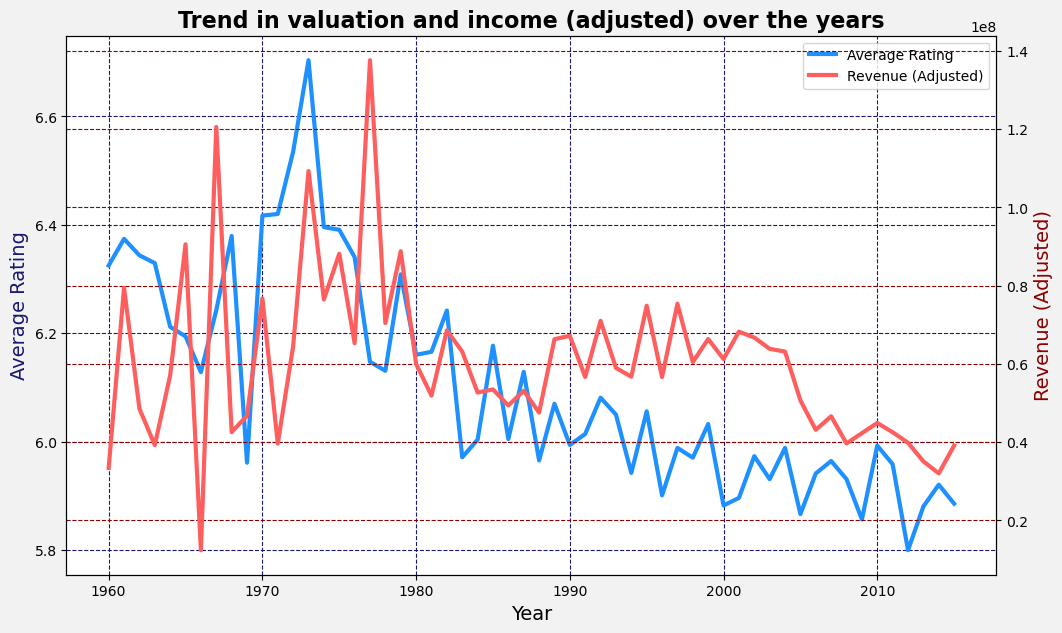

In [16]:
plot_dual_axes(df, 'release_year', 'average_rating', 'revenue_adj',
               title='Trend in valuation and income (adjusted) over the years',
               x_label='Release Year', y1_label='Average Rating', y2_label='Revenue (Adjusted)',
               linewidth=3)

1.  Decline in Revenue: There's a noticeable downward trend in inflation-adjusted revenue over the years. This could suggest that either films are not performing as well financially as they used to or that there may be a greater number of films sharing the market, resulting in lower revenue per film.

2.  Average Rating Stability: The average rating of movies shows fluctuation but remains within a relatively narrow range between approximately 6.0 and 6.8 over the years. This suggests a general consistency in the quality of films as rated by audiences or critics, or it might reflect the stable nature of rating systems.

3.  No Strong Correlation: Visually, there does not seem to be a strong correlation between average ratings and revenues. High-rated movies do not necessarily correspond to high revenue years, and vice versa. This reinforces the notion that critical success doesn't always equate to financial success.

4.  Volatility in Ratings: There appears to be more volatility in average ratings during the earlier years (pre-1980s). This could be due to a variety of factors, such as fewer films being made, which would mean each film has a more significant impact on the average rating.

5.  Revenue Peaks: The peaks in revenue seem to correspond with certain years rather than showing a consistent pattern. These peaks could be associated with the release of particularly high-grossing films or film series.

6.  Recent Trends: In the most recent years, there is a sharp decline in revenue, while the average rating does not show a corresponding decrease. This divergence could be due to a change in the industry, such as increased competition from streaming services, a higher number of films with lower individual revenues, or other economic factors affecting movie-going behavior.

7.  Industry Implications: The insights from this graph could lead to deeper questions about the film industry's health and profitability, especially in recent years. The data might prompt industry stakeholders to explore new revenue models or consider different metrics for measuring a film's success beyond box office revenue.

These insights could be further refined with additional context about the film industry, including changes in distribution methods, the impact of digital platforms, the global expansion of the film market, and evolving consumer preferences. Understanding these patterns is essential for filmmakers, producers, and distributors as they adapt to the changing landscape of the movie industry.

### Research question 3
Which values correlate with each other?

In [17]:
def visualize_correlation_matrix(data, columns=None, title=None, figsize=(12, 7)):
    # Selection of columns for the correlation analysis
    correlation_data = data[columns] if columns else data

    # Calculation of the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Visualisation of the correlation matrix with Seaborn
    plt.figure(figsize=figsize)

    # Create the heat map
    heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

    # Add the text values via the heatmap
    for i in range(correlation_matrix.shape[0]):  # Lines
        for j in range(correlation_matrix.shape[1]):  # Columns
            text = heatmap.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                                ha="center", va="center", color="black")

    plt.title(title)
    plt.show()

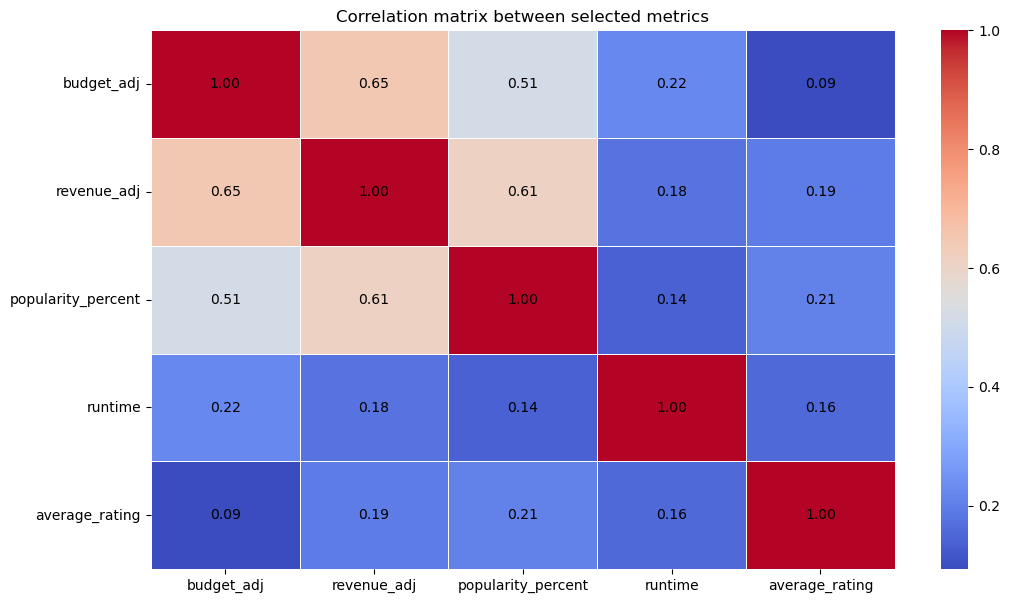

In [18]:
visualize_correlation_matrix(df, columns=['budget_adj', 'revenue_adj', 'popularity_percent', 'runtime', 'average_rating'], title='Correlation matrix between selected metrics')
    

1. Budget and Revenue: There is a moderate positive correlation (0.57) between budget_adj and revenue_adj. This suggests that on average, films with higher budgets tend to generate higher revenues. This  could be due to higher budget films typically having more resources for production quality, casting, and marketing, which might attract larger audiences.

2.  Popularity and Revenue: The correlation between popularity_percent and revenue_adj (0.54) is also moderately positive. This indicates that movies that achieve higher popularity scores are likely to see higher revenue. Popularity could be a reflection of marketing success, social media presence, or overall public interest, which in turn can drive box office sales.

3.  Runtime and Revenue/Budget: There is a weak positive correlation between runtime and both revenue_adj (0.28) and budget_adj (0.33). This suggests that longer movies have a slight tendency to have higher budgets and potentially higher revenues, but the relationship is not strong. It could be that longer films are more likely to be epic or high-production-value features that require larger budgets and attract significant audience interest, though many other factors are likely at play.

4.  Average rating and revenue/popularity: The correlation between average_rating and revenue_adj (0.27) and Popularity_percent (0.32) is weak. This means that although there is a positive relationship between the average rating of a film and its revenue and popularity, this is not a strong predictor. The quality as perceived by the viewing figures is no guarantee of financial success or great popularity.

5.  Lack of Strong Correlation: The absence of very high correlation coefficients (close to 1 or -1) suggests that there's no single factor that can predict the financial or popularity success of a movie. The film industry is influenced by a complex set of factors, and success in one metric does not automatically translate to success in another.

6.  Interpreting the Matrix: When interpreting this correlation matrix, it's important to remember that correlation does not imply causation. High correlation between two variables does not mean one causes the other. Additionally, outliers, data distribution, and the presence of other confounding variables can affect the correlation.

These insights can guide further investigation, such as looking into why certain movies with higher budgets don't always lead to high revenue, or exploring strategies that make movies more popular regardless of their budget or revenue generation. It's also essential to combine these statistical insights with industry knowledge for a comprehensive understanding.

<a id='conclusions'></a>
## Conclusions
The comprehensive analysis of the TMDB film data set reveals significant trends in the film industry. Over the years, there has been a clear growth in film production, with a marked preference for the drama genre, followed by comedies and thrillers. Despite fluctuations in the popularity of the various genres, there has been a growing enthusiasm for science fiction, particularly in recent years.

The revenues and ratings of films show a general tendency to decline over time, which could indicate changing market conditions or quality perceptions. Nevertheless, the analysis suggests that a higher budget tends to correlate with higher revenues, although a good rating alone is no guarantee of success.

In conclusion, the film industry is influenced by a variety of factors, including genre preferences, financial investment and the changing tastes of audiences. Future studies could benefit from a more in-depth look at the influences of individual factors, as well as expanding on additional data points to further explore and understand the trends observed here.

### Limitations and further research
Although these conclusions are based on the data presented, they should be viewed with caution. The analysis is subject to the limitations of data quality and availability. Furthermore, the results are dependent on the chosen methods of analysis and interpretation. Further research could integrate additional variables and data sources to develop a more comprehensive understanding of the complex dynamics in the film industry.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295